In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Membaca .csv
df = pd.read_csv('Dataset/studentRegistration.csv')

In [3]:
# Membaca Informasi basic mengenai .csv
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [4]:
# Menampilkan 5 row awal pada .csv
df.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [5]:
# Mengecek value yang kosong pada .csv
df.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [6]:
# Set style
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20,20))

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

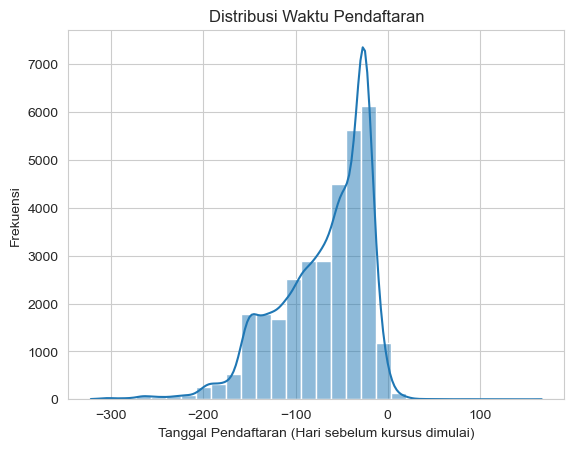

In [7]:
# 1. Distribusi Waktu Pendaftaran
sns.histplot(df['date_registration'], bins=30, kde=True)
plt.title('Distribusi Waktu Pendaftaran')
plt.xlabel('Tanggal Pendaftaran (Hari sebelum kursus dimulai)')
plt.ylabel('Frekuensi')
plt.show()

# Menunjukkan kapan mahasiswa mendaftar relatif terhadap awal kursus.

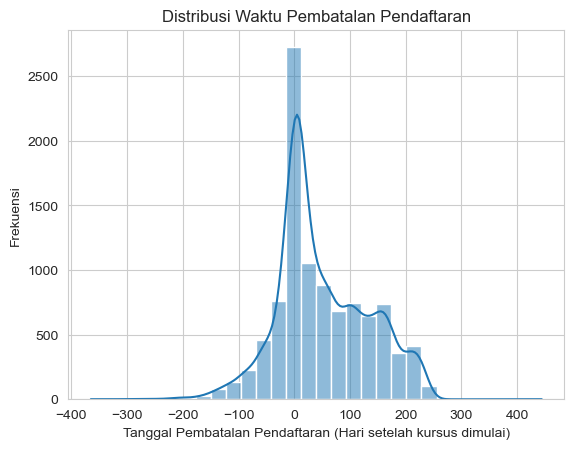

In [8]:
# 2. Distribusi Waktu Pembatalan Pendaftaran
sns.histplot(df['date_unregistration'].dropna(), bins=30, kde=True)
plt.title('Distribusi Waktu Pembatalan Pendaftaran')
plt.xlabel('Tanggal Pembatalan Pendaftaran (Hari setelah kursus dimulai)')
plt.ylabel('Frekuensi')
plt.show()

# Menunjukkan kapan mahasiswa membatalkan pendaftaran.

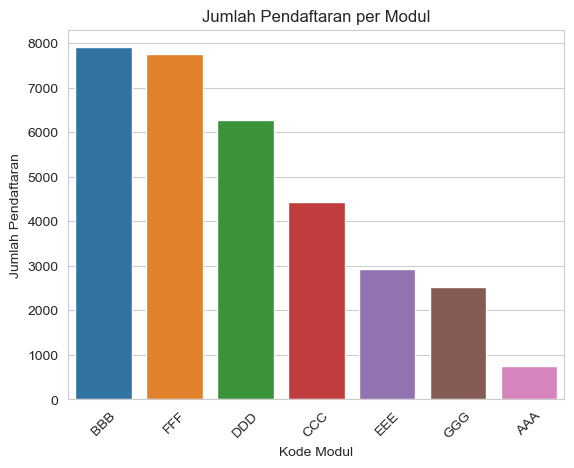

In [9]:
# 3. Jumlah Pendaftaran per Modul
sns.countplot(data=df, x='code_module', order = df['code_module'].value_counts().index)
plt.title('Jumlah Pendaftaran per Modul')
plt.xlabel('Kode Modul')
plt.ylabel('Jumlah Pendaftaran')
plt.xticks(rotation=45)
plt.show()

# Menunjukkan popularitas modul.

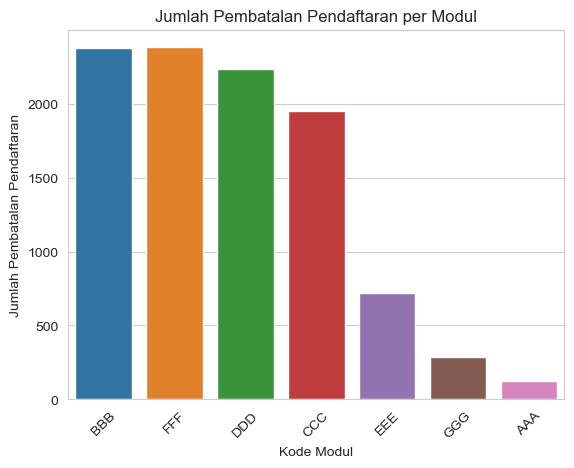

In [10]:
# 4. Jumlah Pembatalan Pendaftaran per Modul
sns.countplot(data=df[df['date_unregistration'].notna()], x='code_module', order = df['code_module'].value_counts().index)
plt.title('Jumlah Pembatalan Pendaftaran per Modul')
plt.xlabel('Kode Modul')
plt.ylabel('Jumlah Pembatalan Pendaftaran')
plt.xticks(rotation=45)
plt.show()

# Menunjukkan tingkat pembatalan pendaftaran per modul.

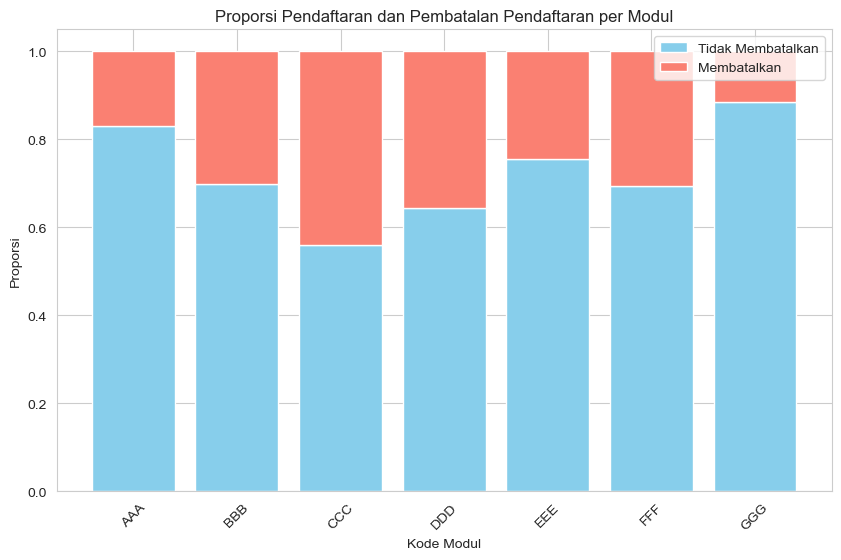

In [13]:
# 5. Proporsi Pendaftaran dan Pembatalan Pendaftaran per Modul
# Menghitung jumlah total dan jumlah pembatalan per modul
total_registration = df.groupby('code_module')['id_student'].count()
cancelled_registration = df[df['date_unregistration'].notna()].groupby('code_module')['id_student'].count()

# Menghitung proporsi
prop_cancelled = cancelled_registration / total_registration
prop_not_cancelled = 1 - prop_cancelled

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(prop_not_cancelled.index, prop_not_cancelled.values, label='Tidak Membatalkan', color='skyblue')
plt.bar(prop_cancelled.index, prop_cancelled.values, bottom=prop_not_cancelled.values, label='Membatalkan', color='salmon')
plt.xlabel('Kode Modul')
plt.ylabel('Proporsi')
plt.title('Proporsi Pendaftaran dan Pembatalan Pendaftaran per Modul')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Menunjukkan proporsi pendaftaran yang membatalkan dan yang tidak per modul.